In [1]:
from IPython.display import clear_output
!pip install gdown
clear_output()
!gdown --id "1y05hZ9qGRhVwlJwf_3_6bsuPZ1ZHGJVU"

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1y05hZ9qGRhVwlJwf_3_6bsuPZ1ZHGJVU
To: /content/CC_Customer_Dataset.csv
100% 16.5k/16.5k [00:00<00:00, 39.4MB/s]


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [5]:
from sklearn.preprocessing import StandardScaler

df2 = pd.read_csv("CC_Customer_Dataset.csv")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [7]:
X2 = df2.drop(columns=['Sl_No', 'Customer Key'])
X2 = StandardScaler().fit_transform(X2)

Membuat model klasterisasi menggunakan Agglomerative Clustering



In [8]:
model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
labels = model.fit_predict(X2)
df2['Cluster'] = labels

Membuat scatterplot dengan dua variabel



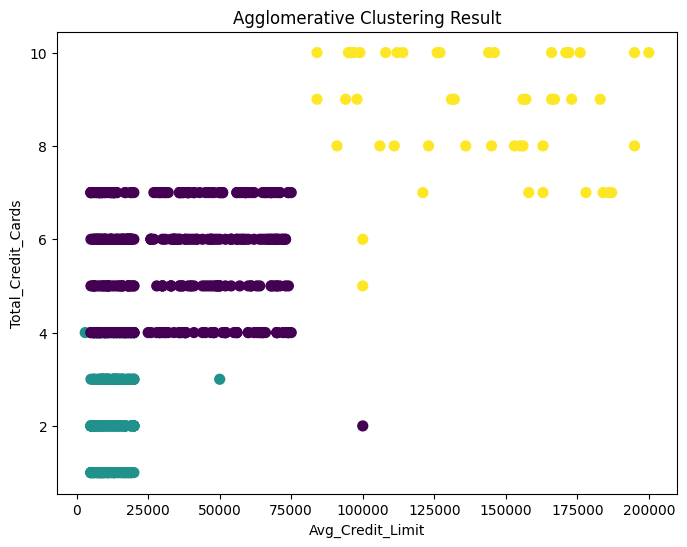

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(df2['Avg_Credit_Limit'], df2['Total_Credit_Cards'], c=df2['Cluster'], cmap='viridis', s=50)
plt.xlabel('Avg_Credit_Limit')
plt.ylabel('Total_Credit_Cards')
plt.title('Agglomerative Clustering Result')
plt.show()

Menentukan silhoutte score dan DBI



In [10]:
sil_score = silhouette_score(X2, labels)
dbi_score = davies_bouldin_score(X2, labels)

print(f'Silhouette Coefficient: {sil_score}')
print(f'Davies-Bouldin Index: {dbi_score}')

Silhouette Coefficient: 0.5147639589977819
Davies-Bouldin Index: 0.680959518994733
